# STOR 120: Midterm 2

**Due:** Friday, October 29, 10:10 am on Gradescope
  
**Directions:** The exam is open book, notes, course materials, internet, and all things that are not direct communication with others. Just as with all course assignments, you will submit exams to Gradescope as Jupyter Notebooks with the ipynb file extension. To receive full credit, you should show all of your code used to answer each question.

For each question you may use as many lines of code as needed, and may add cells as well. Run the cell below.

**Run the cell below to import the datasets.**

In [35]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
from scipy import stats
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Question 1 (16 Points)

We have a number wheel that contains all of the numbers from 5 to 100 by 5 (i.e. 5,10,15,20,25,...,100). This wheel is used in a game between 2 people where the winner gets \$10 paid by the loser. Each person spins the wheel once, and then decides if they want to spin it again. If they refuse to spin the wheel, they get a 0 for that spin. Each person gets a maximum of 2 spins. The winner is the person who has a total (sum of spin 1 and spin 2) that is closest to 100 without going over. If both people have the same total, then neither person wins. If both individuals go over 100, then neither person wins. Each individual makes their decision about spinning the wheel a second time without knowing what the other individual got on their first spin and without knowing whether or not the other person decides to spin again.

## 1.1 (2 Points)
First, I want you to create a function named **spin** with no arguments that returns a random number from this number wheel. The function is simulating one spin of the wheel. The function you create should go in the first code block below. The last code block will run the function 3 times to test that it works.

In [36]:
# Put your function here
def spin():
    return np.random.choice(np.arange(5, 101, 5))

In [37]:
for i in np.arange(3): #Do Not Change
    print(spin()) #Do Not Change

10
30
60


## 1.2 (2 Points)
Mario has a strategy for this game. If the first spin is below 40, he will spin again. If the first spin is 40 or higher, he will not spin again and take a 0 for the second spin. Write a function called **mario_strategy** that contains no arguments and returns the total from 2 spins based on Mario's strategy. This function should use the **spin()** function created before in it. The function you create should go in the first code block below. The last code block will run the function 3 times to test that it works.

In [46]:
def mario_strategy():
    first_spin = spin()
    
    if first_spin < 40:
        second_spin = spin()
        return first_spin + second_spin
    
    return first_spin

In [52]:
for i in np.arange(3): #Do Not Change
    print(mario_strategy()) #Do Not Change

100
40
85


## 1.3 (2 Points)
Jeff has a strategy for this game. If the first spin is below 60, he will spin again. If the first spin is 60 or higher, he will not spin again and take a 0 for the second spin. Write a function called **jeff_strategy** that contains no arguments and returns the total from 2 spins based on Jeff's strategy. This function should use the **spin()** function created before in it. The function you create should go in the first code block below. The last code block will run the function 3 times to test that it works.

In [111]:
def jeff_strategy():
    first_spin = spin()
    
    if first_spin < 60:
        second_spin = spin()
        return first_spin + second_spin
    
    return first_spin

In [112]:
for i in np.arange(3): #Do Not Change
    print(jeff_strategy()) #Do Not Change

55
95
90


## 1.4 (4 Points)
Write a function called **one_game** that takes two arguments, **jeff_total** and **mario_total**, and returns the amount of money won from Jeff's point of view. This means that if Jeff win's, the function should return 10. If Jeff loses, the function should return -10. If there is a tie after 2 spins or both Jeff and Mario go over 100, the function should return 0. You will need to use *if* and *elif* in the function to handle all the cases. It may also be beneficial to remember that $3<a<10$ is equivalent to saying $a>3$ **and** $a<10$. 

The first code block should be run to illustrate some key aspects of boolean logic. The function you create should go in the second code block below. The last code block will run the function 4 times to test that it works.

In [61]:
a = 3
b = 5

a<4 and b>4, 1<a<5, a<b<7,b<4 and a<b

(True, True, True, False)

In [66]:
def one_game(jeff_total, mario_total): 
    if (mario_total < jeff_total <= 100) or (jeff_total <= 100 < mario_total):
        return 10
    
    elif (jeff_total < mario_total <= 100) or (mario_total <= 100 < jeff_total):
        return -10
    
    else:
        return 0

In [74]:
print(one_game(95,10)) #Do Not Change
print(one_game(30,100)) #Do Not Change
print(one_game(120,10)) #Do Not Change
print(one_game(30,140)) #Do Not Change

10
-10
-10
10


## 1.5 (3 Points)
In the code block below, simulate 50,000 games and save the amount of money that Jeff wins from each of the games in an array called **winnings**.

In [86]:
winnings = make_array()
for i in np.arange(50000):
    winning = one_game(jeff_strategy(), mario_strategy())
    winnings = np.append(winnings, winning)

print(winnings) #Do Not Change

[-10.  10.   0. ...  10.  10.  10.]


## 1.6 (3 Points)
Create a figure in the code block below that shows the distribution of winnings and then answer the **question** in the following code block.

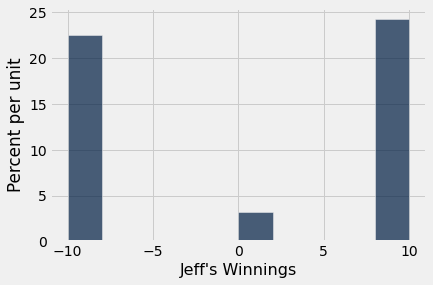

In [87]:
Table().with_column('Jeff\'s Winnings', winnings).hist()

Based on your figure above, do you believe that Jeff's strategy is better than Mario's strategy? Why or why not? Answer this question in complete sentences below:

*The 10 column is taller than the -10 column, indicating that Jeff wins more times than he loses. This means that Jeff's strategy is stronger than Mario's.*

# Question 2 (11 Points)
In class, we looked at the empirical distribution of the sample mean. We saw how the distribution of the sample mean became more normally distributed as we increased the sample size. Now we want to look at the empirical distribution of the sample standard deviation. In the code chunk below we read in a table that contains the salaries of all NBA players in the 2015 to 2016 season. This is the full population we want to study. 

In [88]:
salaries = Table.read_table('nba_salaries.csv').select("'15-'16 SALARY").relabeled(0,'SALARY')
salaries

SALARY
18.6717
12
9.75625
8
5.74648
4
3.33333
2
1.7634
1.30452


## 2.1 (3 Points)
Create a function named **sample_std** with one argument **size**. This function should obtain a simple random sample of a specified **size** from the table salaries and then return the standard deviation of that sample. Samples should be taken without replacement. Put your function in the code block below, and then run the second code block to test out your function.

In [104]:
def sample_std(size):
    return np.std(salaries.sample(size, with_replacement = False).column('SALARY'))

In [105]:
n=salaries.num_rows #Do Not Change
sal_std = np.std(salaries.column('SALARY')) #Do Not Change
sal_std_2 = sample_std(n) #Do Not Change
n,sal_std,sal_std_2 #Do Not Change

(417, 5.215172804825777, 5.215172804825777)

## 2.2 (3 Points)
Create a function named, **simulate_5000_stds** that has one argument **size**. This function should repeatedly run the function **sample_std(size)** 5,000 times, and then return an array of the standard deviation from 5,000 samples of the specified **size**. Put your function in the code block below, and then run the second code block to test out your function.

In [107]:
def simulate_5000_stds(size):
    stds = make_array()
    for i in np.arange(5000):
        std = sample_std(size)
        stds = np.append(stds, std)
        
    return stds

In [108]:
simulate_5000_stds(10) #Do Not Change

array([6.74841809, 5.59231348, 5.14505428, ..., 6.82657381, 4.7291247 ,
       3.09697284])

## 2.3 (5 Points)
Run the function **simulate_5000_stds()** for three different sample sizes: 10,100,300. Save your arrays in a table called **std_table** under three variable names, respectively: "n=10", "n=100","n=300". Plot the three empirical distributions using overlayed histograms. In the same figure, I also want you to plot a vertical line where the population standard deviation exists. This vertical line should be *red* and should go from the bottom to the top of the graph.

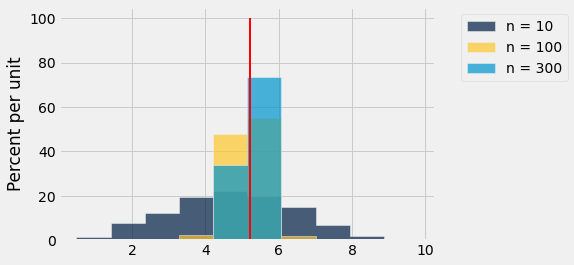

In [121]:
std_table = Table().with_columns(
    'n = 10', simulate_5000_stds(10),
    'n = 100', simulate_5000_stds(100),
    'n = 300', simulate_5000_stds(300)
).hist()
plots.plot([sal_std, sal_std], [0, 1], color='red', lw=2);

# Question 3 (12 Points)
From a random sample of 237 individuals, we record two pieces of information. The variable **Writing Hand** shows with which hand the individual writes. The possible values for **Writing Hand** is *Left* or *Right*. The variable **IQ** shows the IQ of the individual. The table I want you to use can be found below:

In [122]:
L_v_R = Table.read_table("left_v_right.csv").relabeled(0,"Writing Hand").relabeled(1,"IQ")
L_v_R

Writing Hand,IQ
Left,40.6933
Right,44.9967
Right,52.7502
Right,43.5332
Left,63.7508
Right,32.0001
Right,18.1398
Right,45.3947
Left,71.9168
Right,33.6061


For simplicity, if a person writes with their left hand, we categorize them as left-handed. If a person writes with their right hand, we categorize them as right-handed.

We want to test to see if the average IQ for left-handed people is different than the average IQ of right-handed people.

**Question:** Perform a hypothesis test (using A/B testing methods) to draw a conclusion about the null and alternative hypotheses below, using a 5% significance level. Describe your conclusions using simple, non-technical language and write in complete sentences.

**Null Hypothesis:** There is no difference in the average IQ in left-handed versus right-handed people
    
**Alternative Hypothesis**: There is a difference in the average IQ in left-handed versus right-handed people

**To receive full credit you should:**

1. Choose a test statistic

2. Find the value of the observed test statistic

3. Shuffle the labels (Writing Hand) of the original sample, find your simulated test statistic, and repeat at least 1000 times

4. Plot your simulated statistics in a histogram along with the observed test statistic

5. Calculate the p-value based off of your observed and simulated test statistics

6. Use the p-value to draw a conclusion and explain the conclusion using simple, non-technical language in the context of the problem with complete sentences

*You may do this in as many lines as needed, and may add cells as well. You can (should) use functions that we have used in class, homework, labs, or from the text!*

In [160]:
# Test statistic will be the absolute difference between the mean IQ for left-handed people and the mean IQ for right-handed.

test_statistic = abs(np.mean(L_v_R.where('Writing Hand', 'Left').column('IQ')) - np.mean(L_v_R.where('Writing Hand', 'Right').column('IQ')))
test_statistic

1.539218420271638

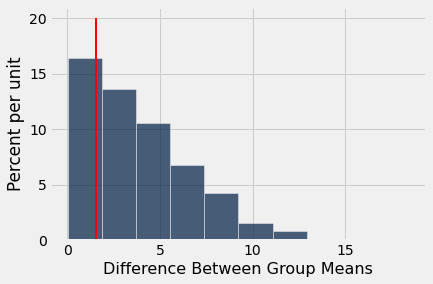

In [162]:
simulated_test_statistics = make_array()

for i in np.arange(1000):
    shuffled_table = Table().with_columns(
        'Shuffled Writing Hand', L_v_R.sample(L_v_R.num_rows, with_replacement = False).column('Writing Hand'),
        'Shuffled IQ', L_v_R.sample(L_v_R.num_rows, with_replacement = False).column('IQ')
    )
    simulated_test_statistic = abs(np.mean(shuffled_table.where('Shuffled Writing Hand', 'Left').column('Shuffled IQ')) - np.mean(shuffled_table.where('Shuffled Writing Hand', 'Right').column('Shuffled IQ')))
    simulated_test_statistics = np.append(simulated_test_statistics, simulated_test_statistic)

Table().with_column('Difference Between Group Means', simulated_test_statistics).hist()
plots.plot([test_statistic, test_statistic], [0, 0.2], color = 'red', lw = 2);

In [163]:
p_value = sum(simulated_test_statistics >= test_statistic) / 1000
p_value

0.742

## Conclusion
Since the p-value is greater than 0.05, we are not able to reject the null hypothesis and we are not able to say that there is a difference in the average IQ in left-handed people versus right-handed people. 

# Question 4 (14 Points)
We have experimental data where 40 rats were randomly assigned to two different protein diets: *Beef* or *Pork*. The weight gain in grams per week was measured for each of the 40 rats. Below you will find a preview of the data in a table named **Rat_Weight**.

In [164]:
Rat_Weight = Table.read_table("FatRats.csv").select(0,2).sort("Gain",descending=True)
Rat_Weight

Gain,Source
120,Pork
118,Beef
117,Beef
111,Beef
108,Pork
107,Beef
106,Pork
105,Pork
104,Beef
102,Beef


## 4.1 (6 Points)

Construct a 95% confidence interval to predict the average weight gain of rats who were fed protein from **Beef**.

**To receive full credit you should:**

1. First subset the sample to only include rats who ate protein from beef

2. Take bootstrap samples from the original sample, compute the average weight gain, and repeat at least 1000 times

3. Determine the upper and lower bounds of the 95% confidence interval

4. Print out the confidence interval as a tuple: lower_bound, upper_bound

You may do this in as many lines as needed, and may add cells as well. You can (should) use functions that we have used in class, homework, labs, or from the text! 

In [173]:
Beef_Rats = Rat_Weight.where('Source', 'Beef')
Beef_Rats

Gain,Source
118,Beef
117,Beef
111,Beef
107,Beef
104,Beef
102,Beef
100,Beef
95,Beef
90,Beef
90,Beef


In [176]:
average_gains = make_array()

for i in np.arange(5000):
    average_gain = np.mean(Beef_Rats.sample(5, with_replacement = True).column('Gain'))
    average_gains = np.append(average_gains, average_gain)

average_gains

array([89.8, 81.8, 83.4, ..., 96. , 81. , 88.4])

In [177]:
lower_bound = percentile(2.5, average_gains)
upper_bound = percentile(97.5, average_gains)
lower_bound, upper_bound

(74.4, 104.0)

## 4.2 (6 Points)

Construct a 95% confidence interval to predict the average weight gain of rats who were fed protein from **Pork**. Then

**To receive full credit you should:**

1. First subset the sample to only include rats who ate protein from pork

2. Take bootstrap samples from the original sample, find your bootstrap statistic, and repeat at least 1000 times

3. Determine the upper and lower bounds of the 95% confidence interval

4. Print out the confidence interval as a tuple: lower_bound, upper_bound

You may do this in as many lines as needed, and may add cells as well. You can (should) use functions that we have used in class, homework, labs, or from the text! 

In [178]:
Pork_Rats = Rat_Weight.where('Source', 'Pork')
Pork_Rats

Gain,Source
120,Pork
108,Pork
106,Pork
105,Pork
102,Pork
102,Pork
98,Pork
97,Pork
96,Pork
94,Pork


In [179]:
average_gains_2 = make_array()

for i in np.arange(5000):
    average_gain_2 = np.mean(Pork_Rats.sample(5, with_replacement = True).column('Gain'))
    average_gains_2 = np.append(average_gains_2, average_gain_2)

average_gains_2

array([97.2, 98.4, 90.6, ..., 90.6, 85.2, 95.8])

In [181]:
lower_bound = percentile(2.5, average_gains_2)
upper_bound = percentile(97.5, average_gains_2)
lower_bound, upper_bound

(73.2, 103.0)

## 4.3 (2 Points)
Do you think we can say that the average weight gain for rats is different between rats who are fed protein from beef and rats who are fed protein from pork? Why or why not? Use your confidence intervals in the previous two questions to justify your answer. Write in complete sentences.

*I do not think that we are able to say that the average weight gain for rats is different between eats who are fed protein from beef and rats who are fed protein from pork. The confidence intervals for both groups are too similar to say that there is any real difference between the average weight gains.*